In [1]:
import sys
sys.path.append('..')
from tool import *
from preprocess.DDRF import resample_wb_fraction 
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k
gc.collect()
print(landarea.sum())
ddd={}
for b in ['NDVI','SSI','NMDI']:
    print(b)
    ddd[b]=[]
    img_y=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_v2_kernel.tif').read(1)
    for m in tqdm(range(1,13)):

        img=rasterio.open(f'/ssd_hzy/G3/{b}{m}.tif').read(1)
        
        img[img==0]=img_y[img==0]
        img[np.isnan(img)]=0
        img=img*z
        img=landarea*img
        ddd[b].append(img.sum()/landarea.sum())

        del img
        gc.collect()
torch.save(ddd,'/data/hk/albedo/seasons_model_dict.pth')

147899077368280.47
NDVI


100%|██████████| 12/12 [15:14<00:00, 76.20s/it]


SSI


100%|██████████| 12/12 [15:46<00:00, 78.86s/it]


NMDI


100%|██████████| 12/12 [16:41<00:00, 83.47s/it]


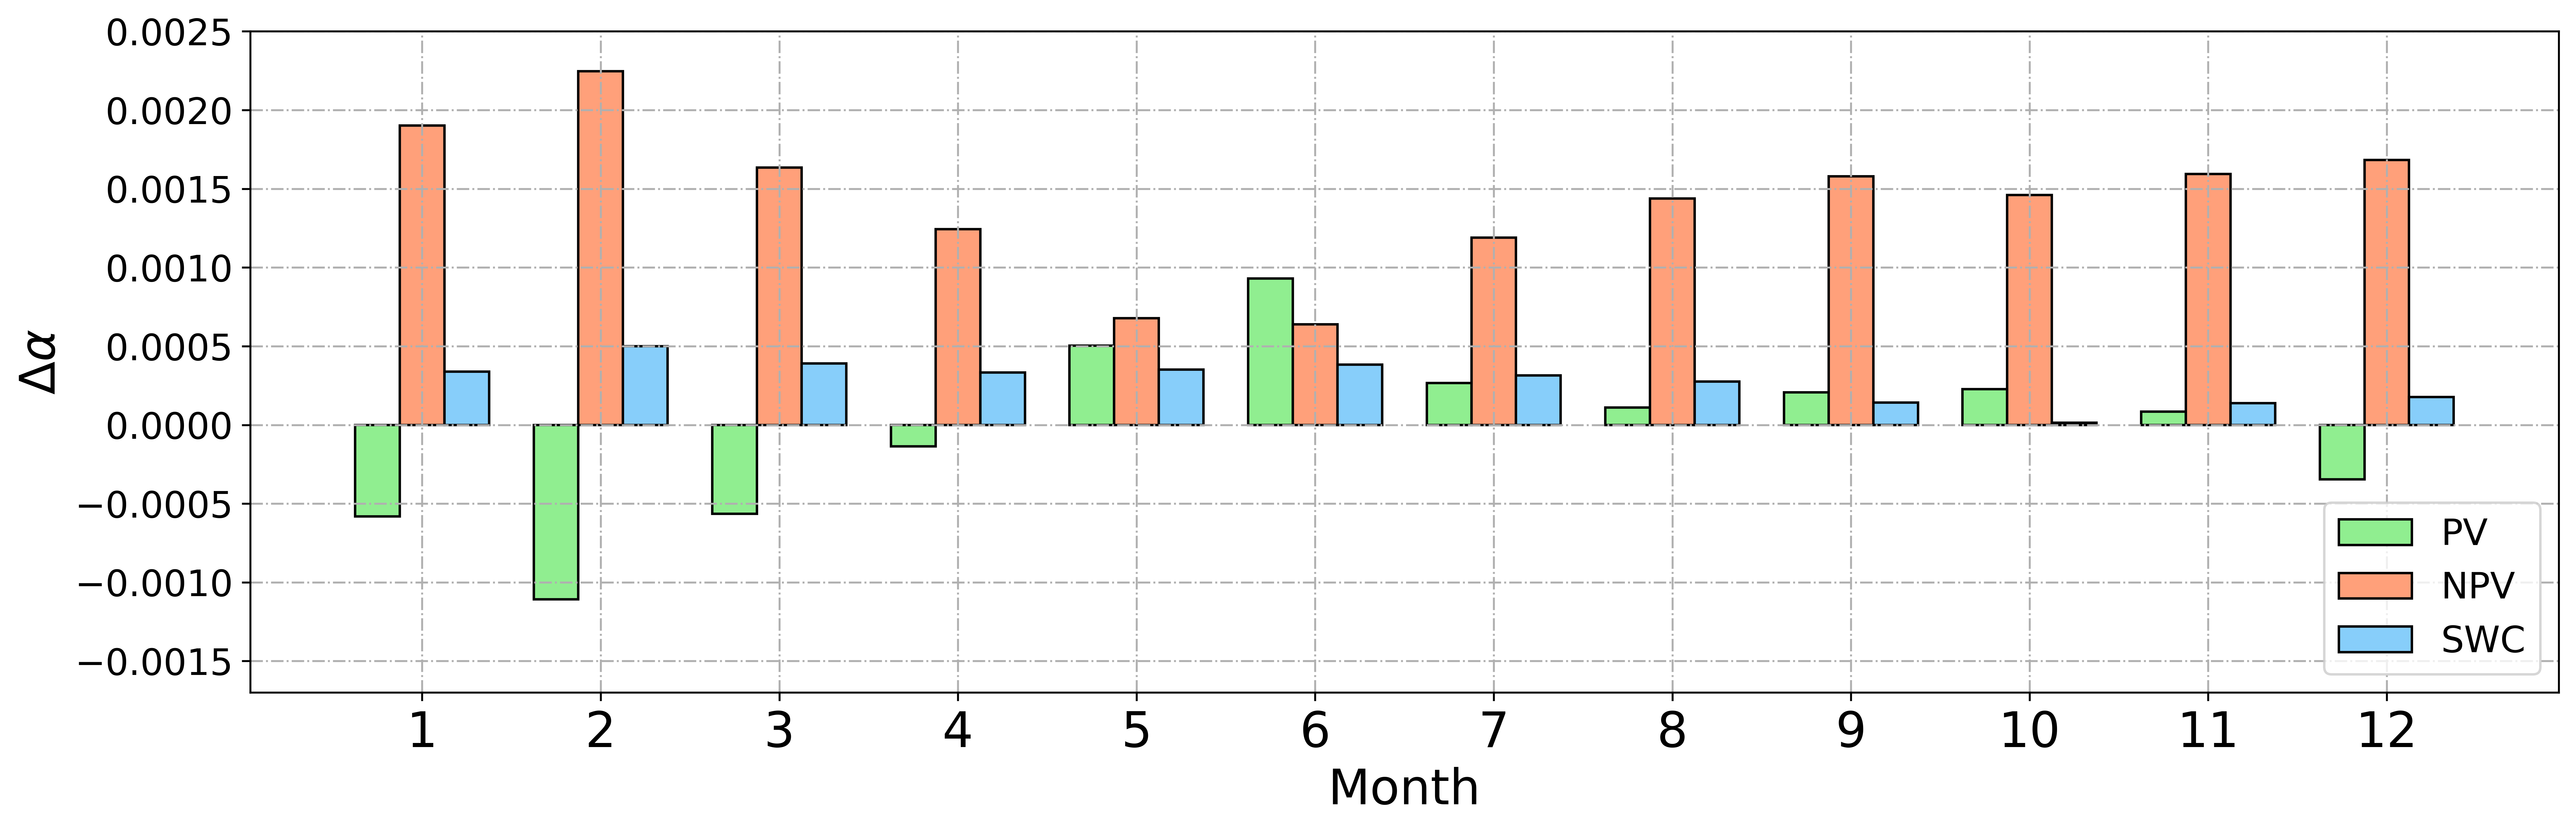

In [ ]:
dd=torch.load('/data/hk/albedo/seasons_model_dict.pth')
plt.figure(figsize=(17,5    
                    ),dpi=600)
x = range(12)
plt.grid(linestyle='-.')
plt.bar(x, dd['NDVI'], width=0.25,color='lightgreen',edgecolor='black',label='PV')

# 向右移动0.2, 柱状条宽度为0.2
plt.bar([i + 0.25 for i in x], dd['SSI'], width=0.25, color='lightsalmon',edgecolor='black',label='NPV')
plt.bar([i + 0.5 for i in x], dd['NMDI'], width=0.25, color='lightskyblue',edgecolor='black',label='SWC')
plt.legend()
# 底部汉字移动到两个柱状条中间(本来汉字是在左边蓝色柱状条下面, 向右移动0.1)
plt.xticks([i + 0.25 for i in x], list(range(1,13)),fontsize=20)


plt.legend(fontsize=15)
# plt.xlim(('2001', '2020'))
plt.ylim((-0.0017, 0.0025))
# plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=15)
plt.ylabel(r'$\Delta \alpha$',fontsize=20)
plt.xlabel(r'Month',fontsize=20)
plt.savefig('./figure/season_model.pdf',dpi=600)
plt.show()


In [1]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=lc01[lc01==lc20]
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k
gc.collect()
print(landarea.sum())
for b in ['NDVI','SSI','NMDI']:
    print(b)
    img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_v2_kernel.tif').read(1)
    img[np.isnan(img)]=0
    img[z==0]=0
    img=landarea*img
    for i in range(1,15):
        img2=img.copy()
        img2[z!=i]=0
        print(type_code[i-1],img2.sum()/landarea.sum())
        del img2
        gc.collect()
    del img
    gc.collect()


147899077368280.47
NDVI
EN_Forests               -1.4894701780586133e-06
EB_Forests               -1.1144690999017817e-05
DN_Forests               -9.046183610262279e-07
DB_Forests               -9.694373464519078e-06
M_Forests                -4.674438021080675e-06
C_Shrublands             1.1586475270548671e-05
O_Shrublands             0.0006432372531562861
W_Savannas               -2.4685781044769596e-05
Savannas                 -6.225856445818818e-06
Grasslands               -0.0003130978868423521
Permanent_Wetlands       -1.7044618158722428e-06
Croplands                -0.00028687963395705436
Urban                    -4.121862595745773e-06
Cropland Natural_Mosaics -7.5534105957075495e-06
SSI
EN_Forests               1.0140366073202108e-05
EB_Forests               -2.765758199471375e-06
DN_Forests               1.3692428037790758e-06
DB_Forests               2.5212087993197955e-05
M_Forests                3.706846853307495e-05
C_Shrublands             1.0875338394598605e-06
O_Shrubl

In [ ]:
cc_kernel=[[-1.4894701780586133e-06,
-1.1144690999017817e-05,
-9.046183610262279e-07,
-9.694373464519078e-06,
-4.674438021080675e-06,
1.1586475270548671e-05,
0.0006432372531562861,
-2.4685781044769596e-05,
-6.225856445818818e-06,
-0.0003130978868423521,
-1.7044618158722428e-06,
-0.00028687963395705436,
-4.121862595745773e-06,
-7.5534105957075495e-06],
           
[1.0140366073202108e-05,
-2.765758199471375e-06,
1.3692428037790758e-06,
2.5212087993197955e-05,
3.706846853307495e-05,
1.0875338394598605e-06,
-1.3015143524787383e-05,
6.7545631461447e-05,
0.0001416810809175107,
0.000683665552092179,
7.771540620426676e-06,
0.00042715223719061825,
8.662308982776613e-06,
1.5342472671716644e-05],

[3.9072829141940615e-06,
1.7522732044886714e-05,
-1.1258775078869571e-06,
5.299429860053864e-06,
1.2829362585768966e-05,
2.1113327095675074e-06,
0.00011317530880389624,
2.129618756145945e-05,
5.056376857344159e-05,
2.869413699116979e-05,
1.3568252096318999e-06,
2.6957696208911278e-05,
1.0363970236739073e-06,
1.9828323880035517e-06]
]
all=[4.6946151996962726e-05,
 -0.00012580731709022075,
 -5.222938398219412e-06,
 2.117134863510728e-05,
 7.01916214893572e-05,
 2.4719631255720742e-05,
 0.0009967221412807703,
 0.00011649014777503908,
 0.00024005443265195936,
 0.0007798669976182282,
 2.5903173082042485e-05,
 0.0002533207298256457,
 6.371245490299771e-06,
 1.226629228767706e-05]

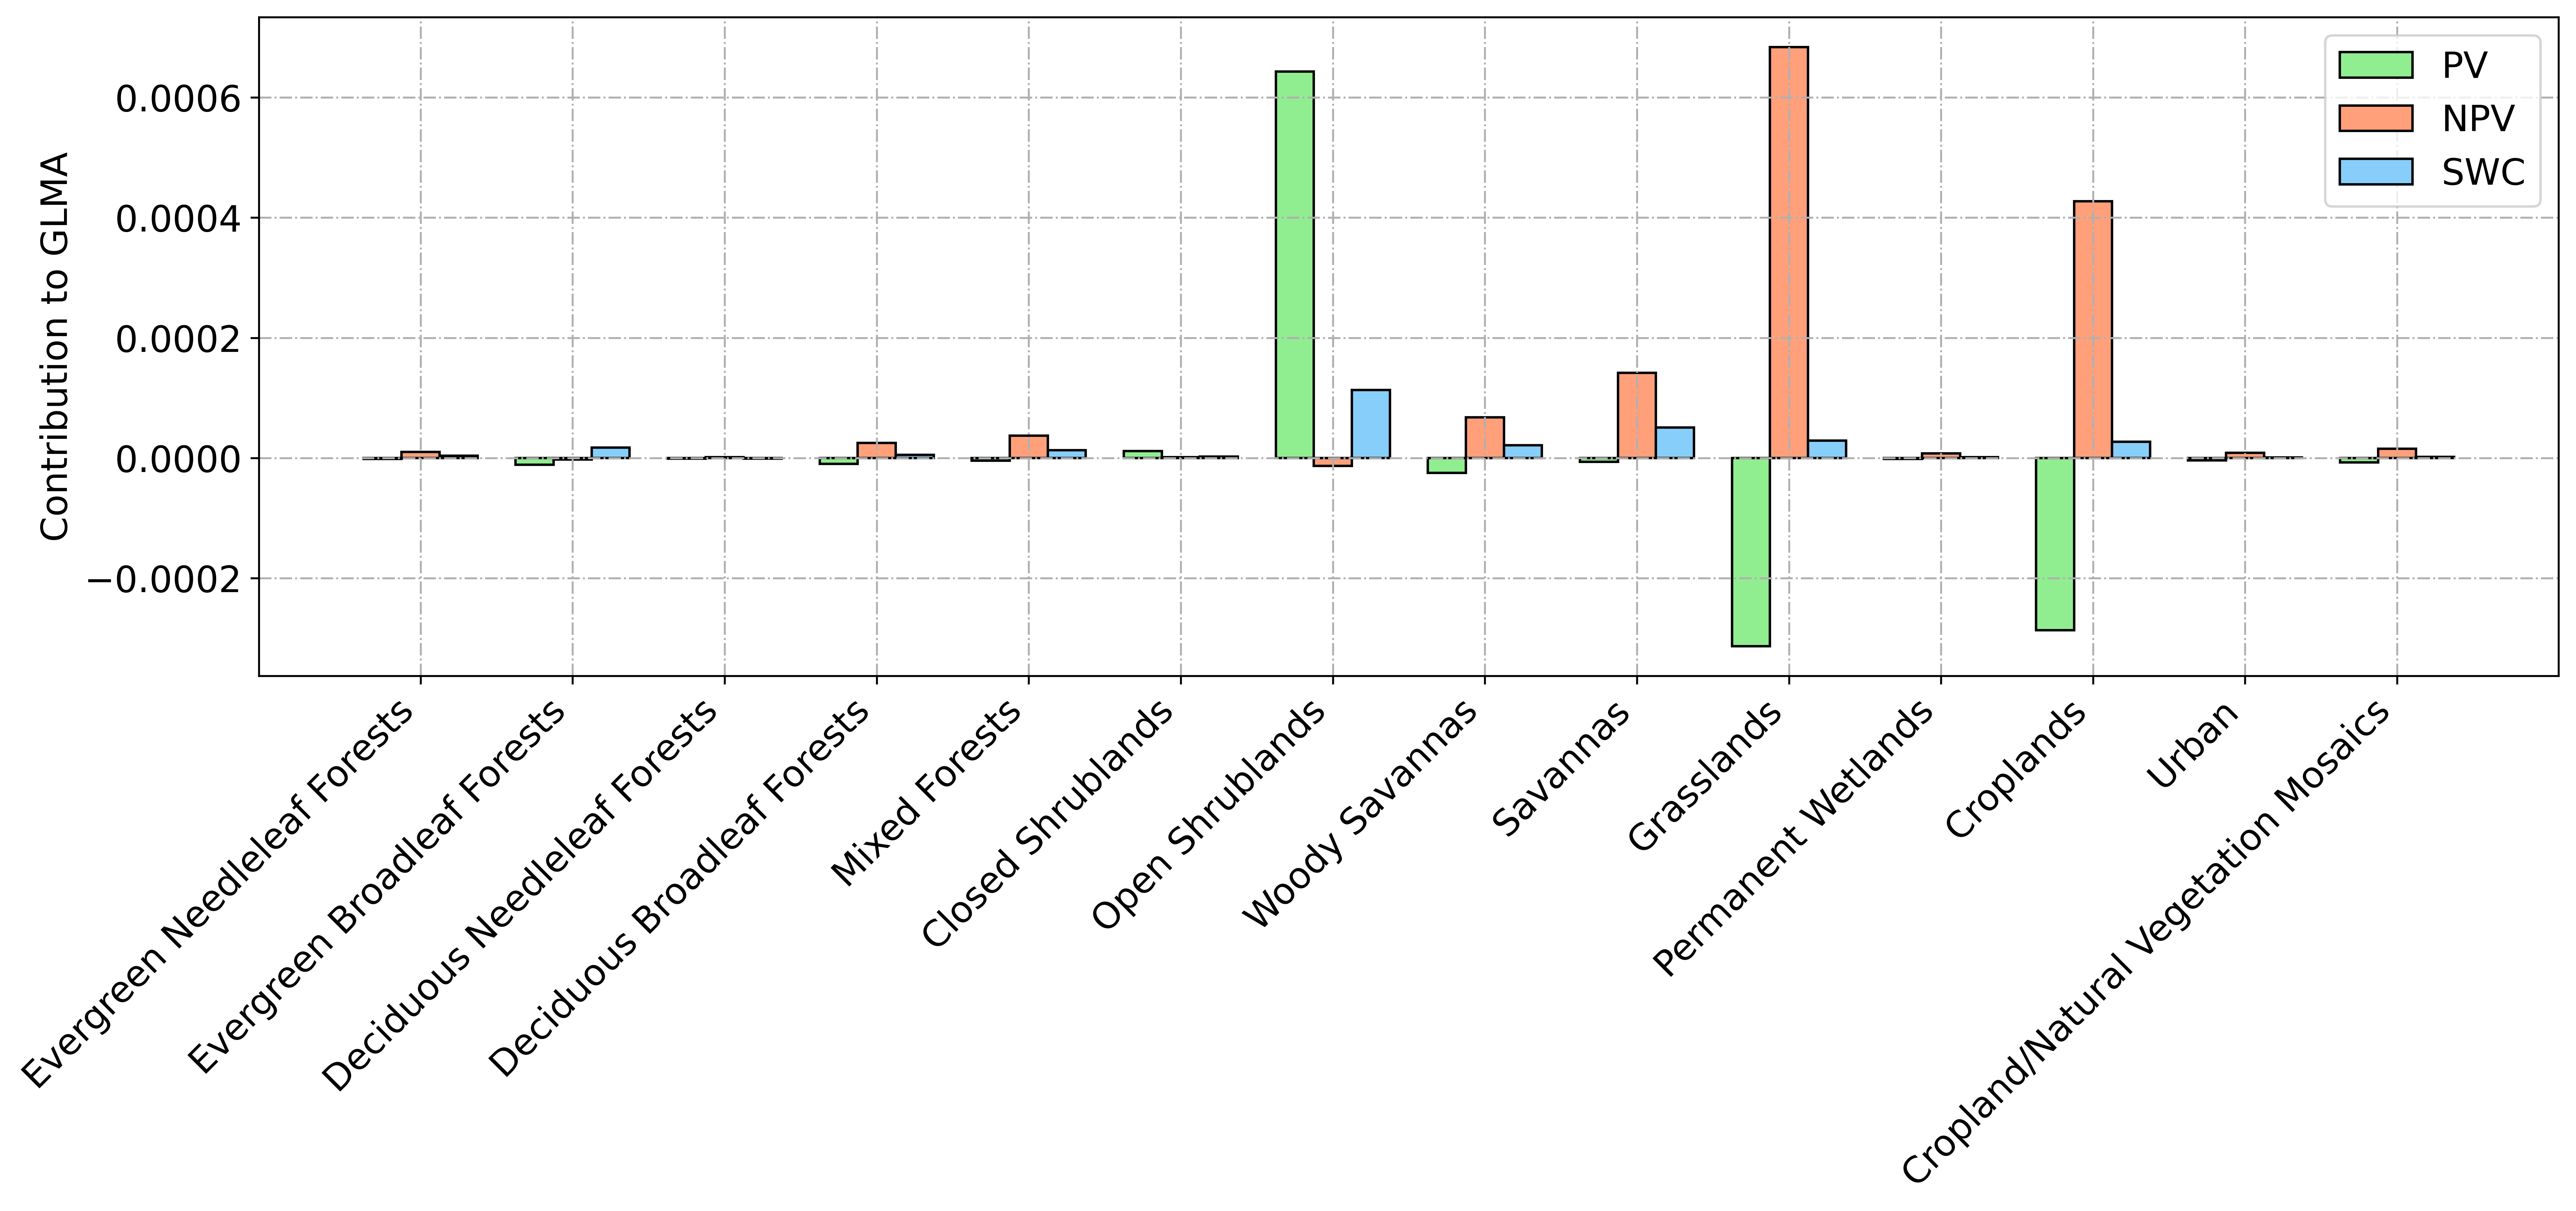

In [ ]:
from tool import *
names=['Evergreen Needleleaf Forests',
 'Evergreen Broadleaf Forests',
 'Deciduous Needleleaf Forests',
 'Deciduous Broadleaf Forests',
 'Mixed Forests',
 'Closed Shrublands',
 'Open Shrublands',
 'Woody Savannas',
 'Savannas',
 'Grasslands',
 'Permanent Wetlands',
 'Croplands',
 'Urban',
 'Cropland/Natural Vegetation Mosaics']
dd=torch.load('/data/hk/albedo/seasons_model_dict.pth')
plt.figure(figsize=(17,5    
                    ),dpi=600)
x = range(14)
plt.grid(linestyle='-.')
plt.bar(x, cc_kernel[0], width=0.25,color='lightgreen',edgecolor='black',label='PV')

# 向右移动0.2, 柱状条宽度为0.2
plt.bar([i + 0.25 for i in x], cc_kernel[1], width=0.25, color='lightsalmon',edgecolor='black',label='NPV')
plt.bar([i + 0.5 for i in x], cc_kernel[2], width=0.25, color='lightskyblue',edgecolor='black',label='SWC')
plt.legend()
# 底部汉字移动到两个柱状条中间(本来汉字是在左边蓝色柱状条下面, 向右移动0.1)
plt.xticks([i + 0.25 for i in x], names,fontsize=15,rotation=45,horizontalalignment='right')


plt.legend(fontsize=15)
# plt.xlim(('2001', '2020'))
# plt.ylim((-0.0017, 0.0025))
# plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=15)
plt.ylabel(r'Contribution to GLMA',fontsize=15)
# plt.xlabel(r'Month',fontsize=20)
plt.savefig('./figure/type_model2_kernel.pdf',dpi=600)
plt.show()


In [1]:
from tool import *
sza,sza_l=torch.load('/data/hk/albedo/SZA.pth')
for b in ['SSI','NMDI','NDVI']:
    img_y=np.zeros((40076, 80152)).astype(np.float32)
    all=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_v2_85.tif').read(1)
    for m in tqdm(range(1,13)):
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))
        now=datetime.datetime.strptime(f'2001-{m}-1', '%Y-%m-%d')
        month_time=(now+relativedelta(months=1)-now).total_seconds()
        img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}{m}_albedo2_multisnow_85.tif').read(1)
        img[img==0]=all[img==0]
        # raise()
        sw=torch.load(f"/data/hk/albedo/kernel/{m}_SW_1degree_kernel2.pth")
        sw=resample_wb_fraction(sw,width=80152,height=40076,resample_alg = gdalconst.GRIORA_NearestNeighbour)
        img[img==0]=np.nan
        img[SZA_L>1]=np.nan
        eg=(-img)*sw*month_time
        eg[np.isnan(eg)]=0
        img_y+=eg
        del img,SZA_L,sw
        gc.collect()
        # raise()
    y_len=365*24*3600
    img_y/=y_len
    tif_save(img_y,f'/data2/hzy/ssd_hzy/G3/{b}_eg_v2_kernel.tif',global_trf,p='4326')
    del img_y,all
    gc.collect()
    # plt.imshow(img_y,vmax=10,vmin=-10,cmap='seismic')
    # plt.colorbar()
    # plt.show()

100%|██████████| 12/12 [09:07<00:00, 45.59s/it]


In [2]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k

gc.collect()
print(landarea.sum())
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_eg_v2_kernel.tif').read(1)
    img[np.isnan(img)]=0
    img=landarea*z*img
    # del img
    # gc.collect()
    print(b,img.sum()/5.1e8/1e6)
    print(b,img[:int(img.shape[0]/2)].sum()/5.1e8/1e6)
    print(b,img[int(img.shape[0]/2):].sum()/5.1e8/1e6)
   
    # print(b,img2[:int(img2.shape[0]/2)].sum()/5.1e8/1e6)
    del img
    gc.collect()

# del landarea
# gc.collect()
# for b in ['NDVI','SSI','NMDI']:
#     img=rasterio.open(f'/ssd_hzy/G3/{b}_eg.tif').read(1)
#     img[np.isnan(img)]=0
#     img=img*z
#     plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
#     plt.colorbar()
#     plt.show()
#     del img
#     gc.collect()

147899077368280.47
NDVI -0.0026561034672919763
NDVI 0.035845845406018755
NDVI -0.03850194887331036
SSI -0.048687747342296986
SSI -0.04776135165484444
SSI -0.0009263956874531913
NMDI -0.01287843473271535
NMDI -0.0017046285917565933
NMDI -0.011173806140958673


2
0 3


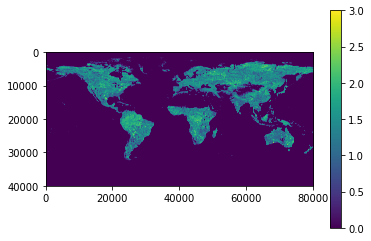

In [ ]:
from tool import *
bb=['NDVI','SSI','NMDI']
imgs=[rasterio.open(f'/data2/hzy/ssd_hzy/G3/{b}_v2_kernel.tif').read(1) for b in bb]
print(2)
imgs=np.stack(imgs,axis=0)
imgs=np.abs(imgs)
imgs_id=np.argmax(imgs,axis=0)
for i in range(3):
    imgs_id[imgs[i]==0]=4
    imgs_id[np.isnan(imgs[i])]=4
imgs_id+=1
imgs_id[imgs_id==5]=0
print(imgs_id.min(),imgs_id.max())
# new_trf=(global_trf[0]+global_trf[1],global_trf[1]*2,0,global_trf[3]+global_trf[5],0,global_trf[5]*2)
# tif_save_snowfre(imgs_id,f'/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_kernel.tif',global_trf,p='4326')
plt.imshow(imgs_id)
plt.colorbar()
plt.show()
tif_save(imgs_id,f'/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_kernel.tif',global_trf,p='4326')

In [ ]:
from scipy import signal
def main1():
    bb=['NDVI','SSI','NMDI']
    img=rasterio.open('/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_kernel.tif').read(1)
    for i in range(3):
        print(i)
        kkk=signal.convolve2d((img==(i+1)).astype(np.int8),np.ones((20,20)), mode='same', boundary='symm')
        tif_save(kkk,f'/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_count_{bb[i]}.tif',global_trf,p='4326')
    # kkk=[signal.convolve2d((img==i).astype(np.int8),np.ones((20,20)), mode='same', boundary='symm') for i in range(1,4)]
from tool import *
def main2():
    lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
    lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
    z=np.zeros(lc01.shape)
    z[lc01==lc20]=lc01[lc01==lc20]
    z[lc01==20]=0
    z[lc01==15]=0
    z[lc01==16]=0
    z[lc01==17]=0
    del lc01,lc20
    gc.collect()
    bb=['NDVI','SSI','NMDI']
    kkk=[rasterio.open(f'/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_count_{bb[i]}.tif').read(1) for i in range(3)]
    # img=rasterio.open('/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_kernel.tif').read(1)
    kkk=np.stack(kkk)
    kkk_sum=np.sum(kkk,axis=0)

    kkk2=kkk/(kkk_sum.reshape(1,z.shape[0], z.shape[1]))
    for i in range(3):
        kkk2[i][kkk_sum==0]=0
        kkk2[i][z==0]=0
        tif_save(kkk2[i],f'/data2/hzy/ssd_hzy/G3/albedo_v2_maxid_percent_{bb[i]}.tif',global_trf,p='4326')

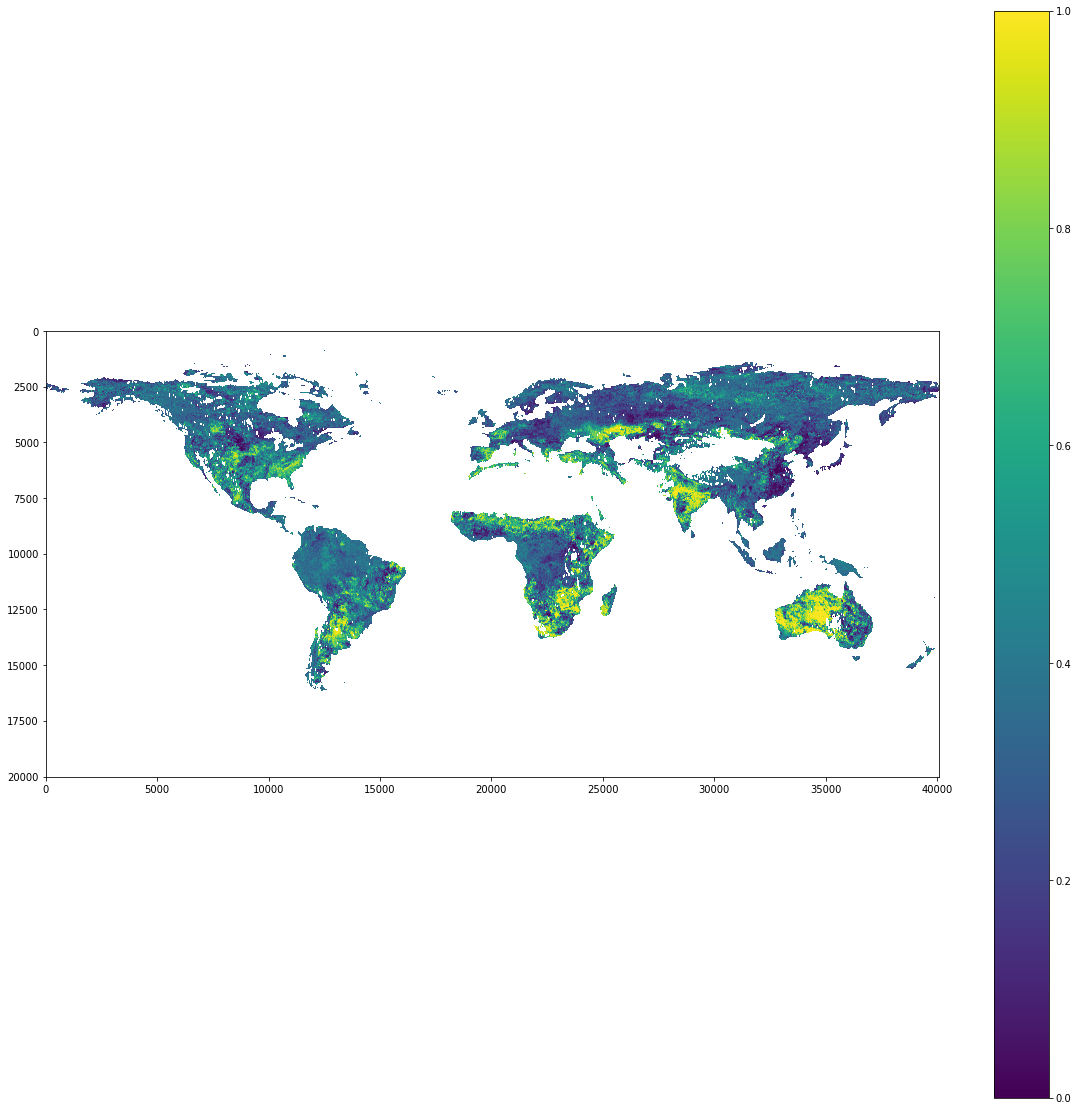

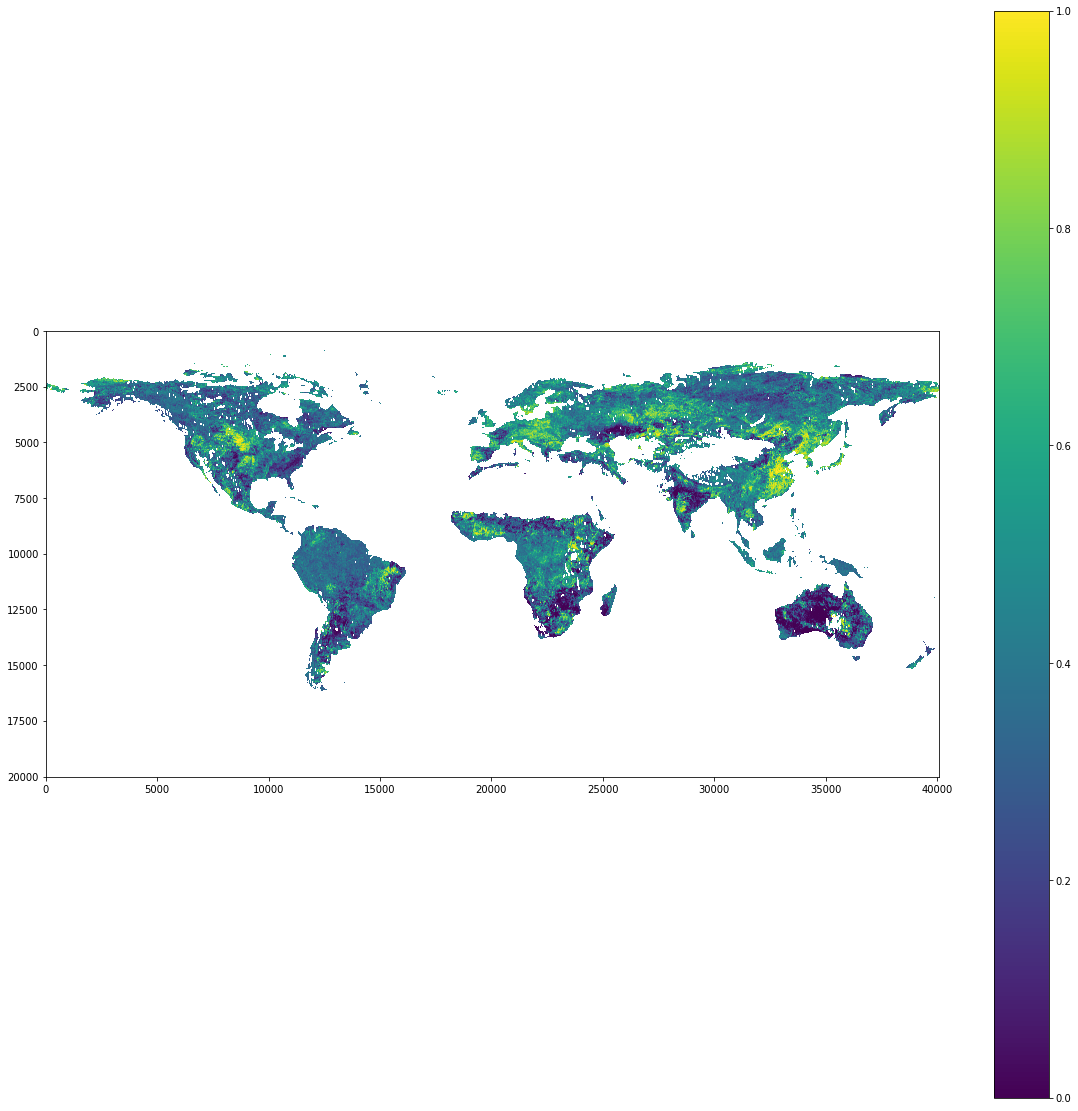

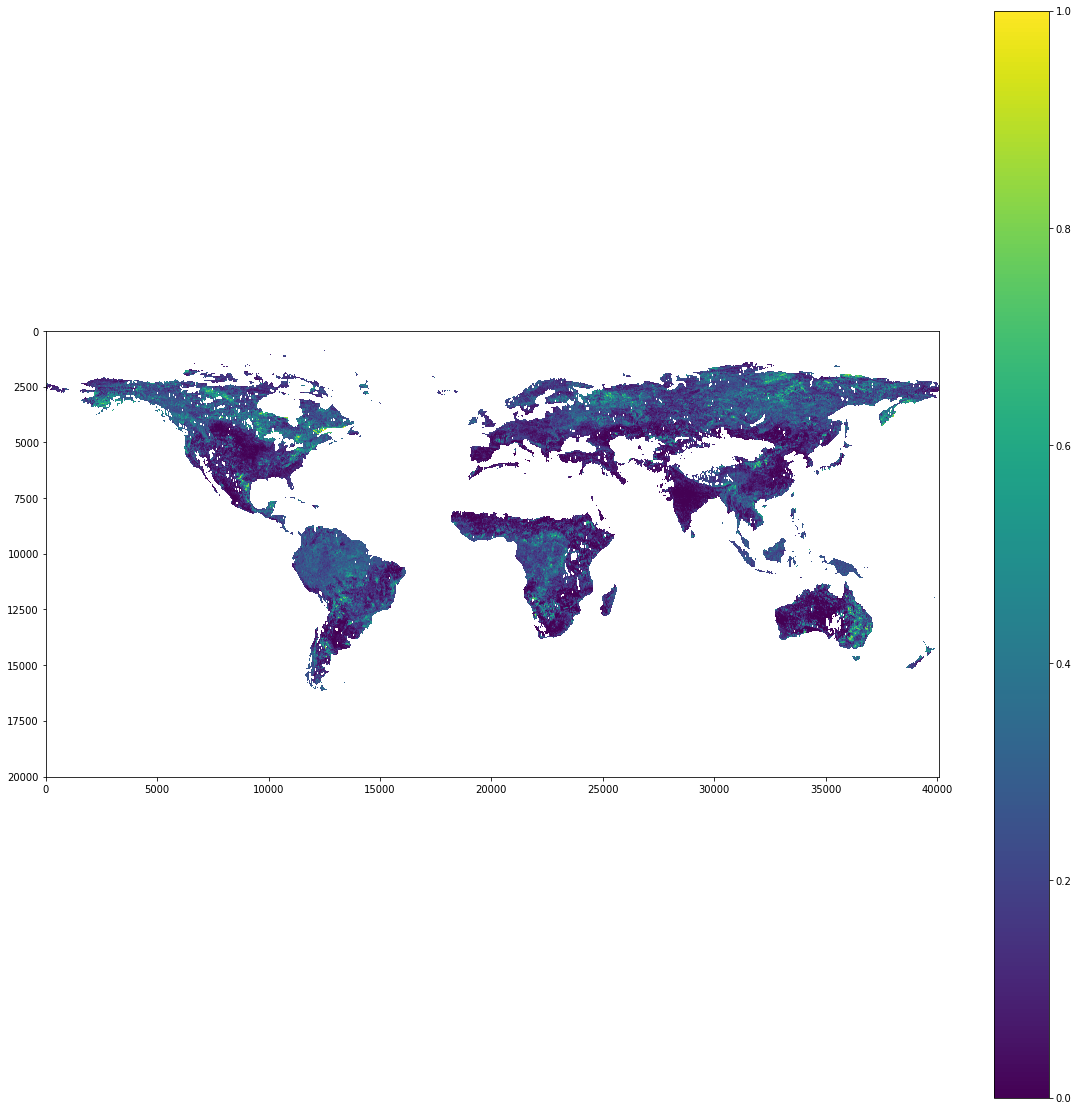

In [ ]:
# plt.figure(figsize=(30,30))
for i in range(3):
    plt.figure(figsize=(20,20))
    plt.imshow(kkk2[i],vmin=0,vmax=1)
    plt.colorbar()
    plt.show()

In [ ]:
from tool import *
bb=['NDVI','SSI','NMDI']
dict={}
for i in range(3):
    img=rasterio.open(f'/data2/hzy/ssd_hzy/G3/{bb[i]}_v2_kernel.tif').read(1)
    img[np.isnan(img)]=0
    img[z==0]=np.nan
    img_lat=np.nanmean(img,axis=1)
    dict[bb[i]]=img_lat
    # plt.figure(figsize=(20,5))
    # plt.plot([global_trf[3]+global_trf[5]*i for i in range(40076)],img_lat)
    # plt.plot([global_trf[3]+global_trf[5]*i for i in range(40076)],[0]*img_lat.shape[0])
    # plt.ylim((-0.025, 0.025))
    # plt.show()

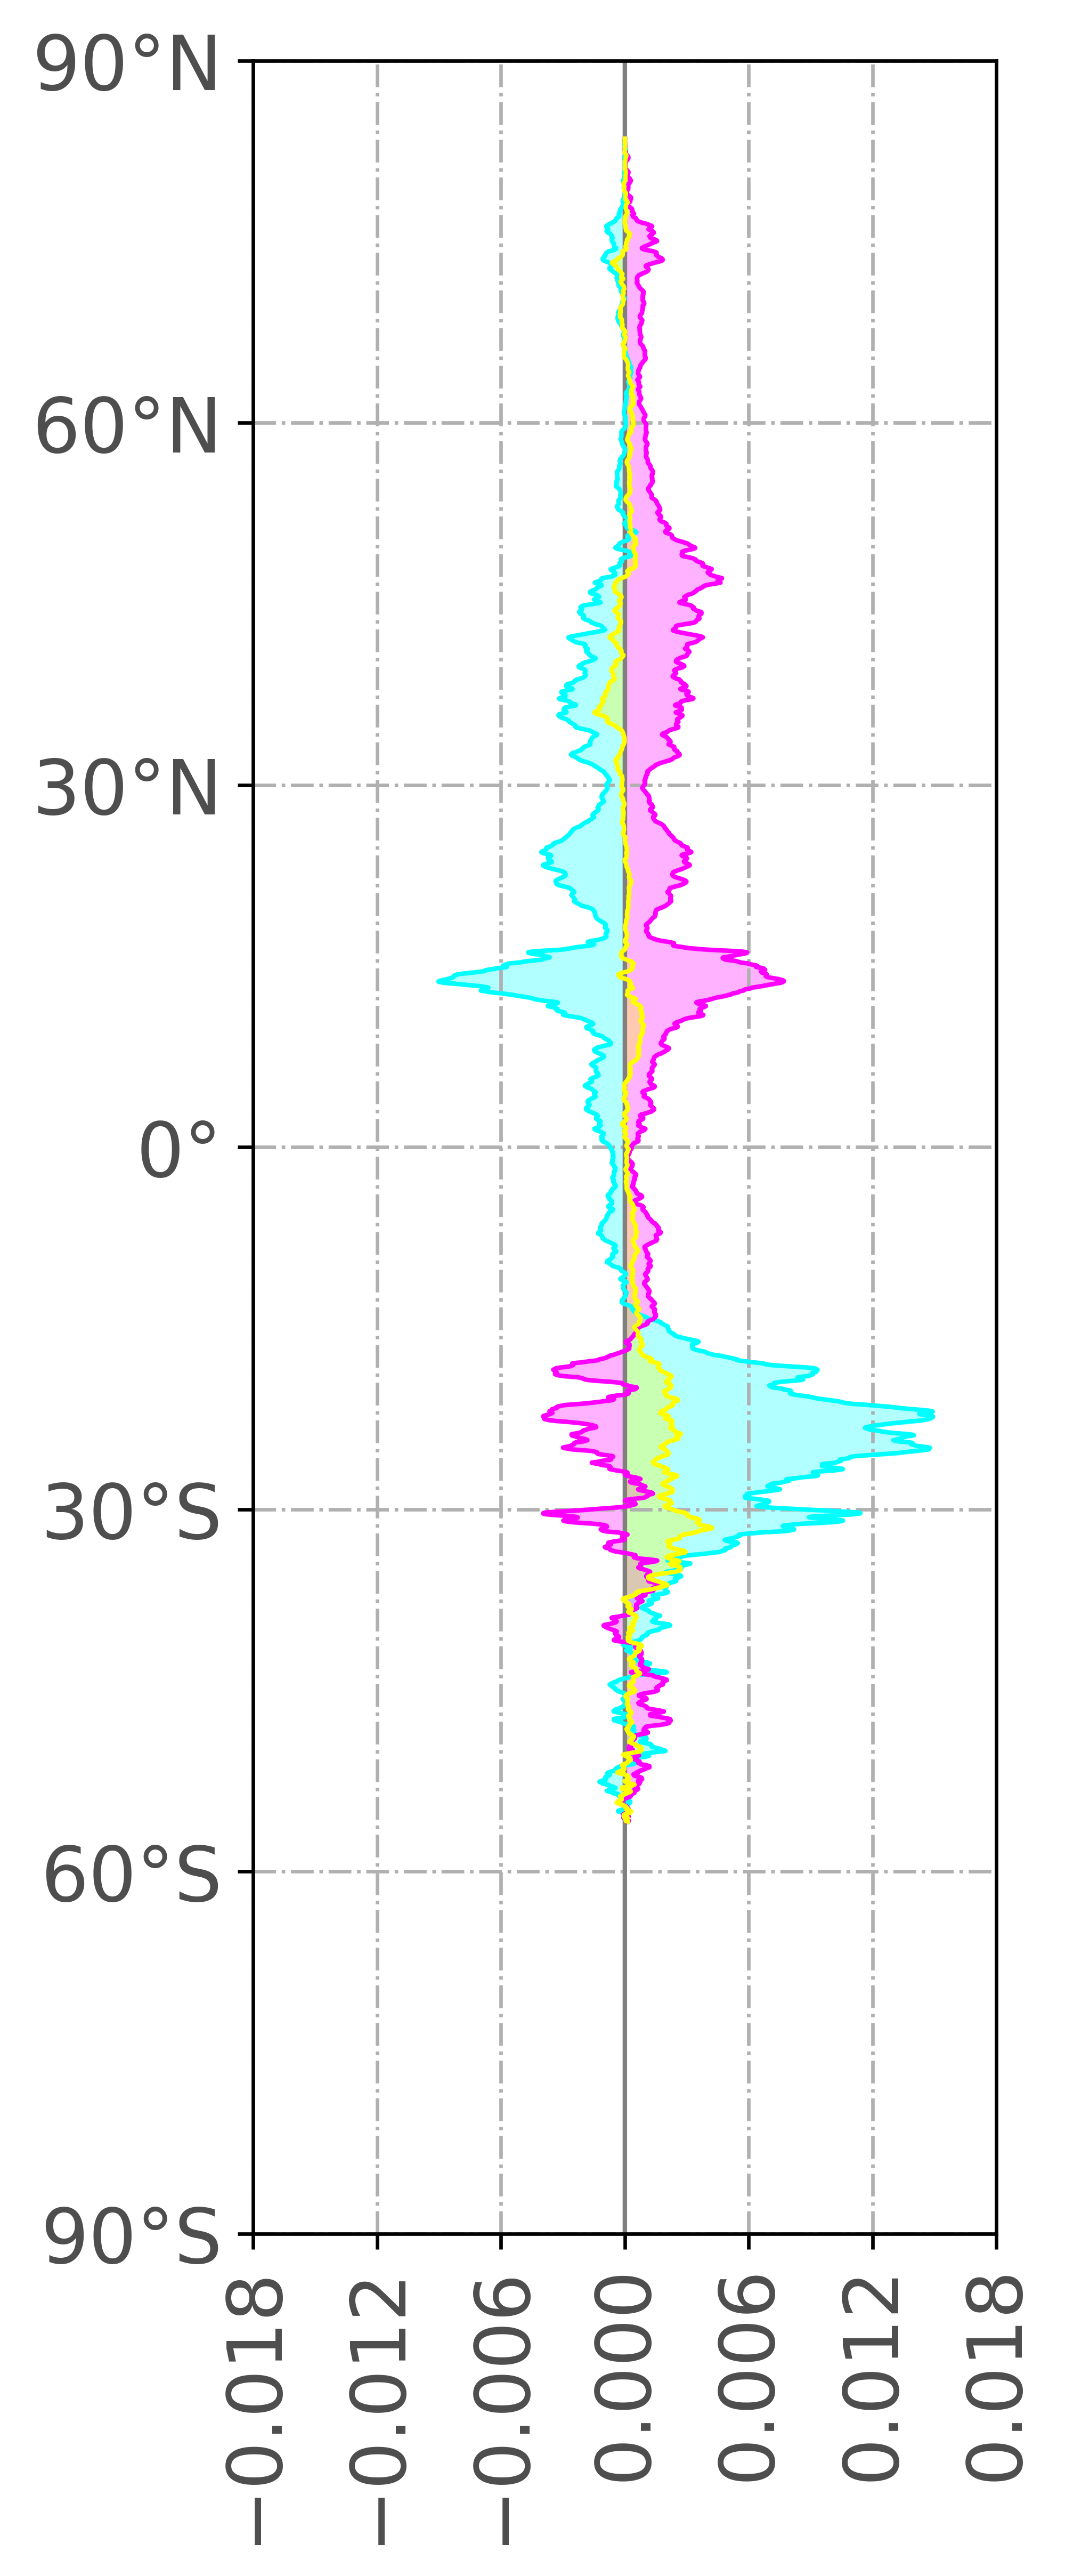

In [ ]:
plt.figure(figsize=(3,9),dpi=600)
y=np.array([global_trf[3]+global_trf[5]*i for i in range(40076)])
plt.plot([0]*40076,y,linewidth=1,color='gray')
bb_name=['PV','NPV','SWC']
cc=['#00ffff','#ff00ff','#ffff00']
for i in range(3):
    
    data=dict[bb[i]].copy()
    data[-6610:]=np.nan
    moving_avg = np.convolve(data, np.ones(56) / 56, mode='same')
    

    plt.plot(moving_avg,y,color=cc[i],linewidth=1,label=bb_name[i])
    plt.fill_betweenx(y,moving_avg,0,color=cc[i],alpha=0.3)
    plt.xlim((-0.018, 0.018))
    plt.ylim((-90, 90))
    plt.yticks([-90+i*30 for i in range(7)],['90°S','60°S','30°S','0°','30°N','60°N','90°N'],fontsize=17,color='#4e4e4e')
    plt.xticks([-0.018+i*0.006 for i in range(7)],rotation=90,fontsize=17,color='#4e4e4e')
plt.grid(linestyle='-.')
# plt.legend()
plt.savefig('../figure/model_lat.pdf',dpi=600,bbox_inches = 'tight')
plt.show()

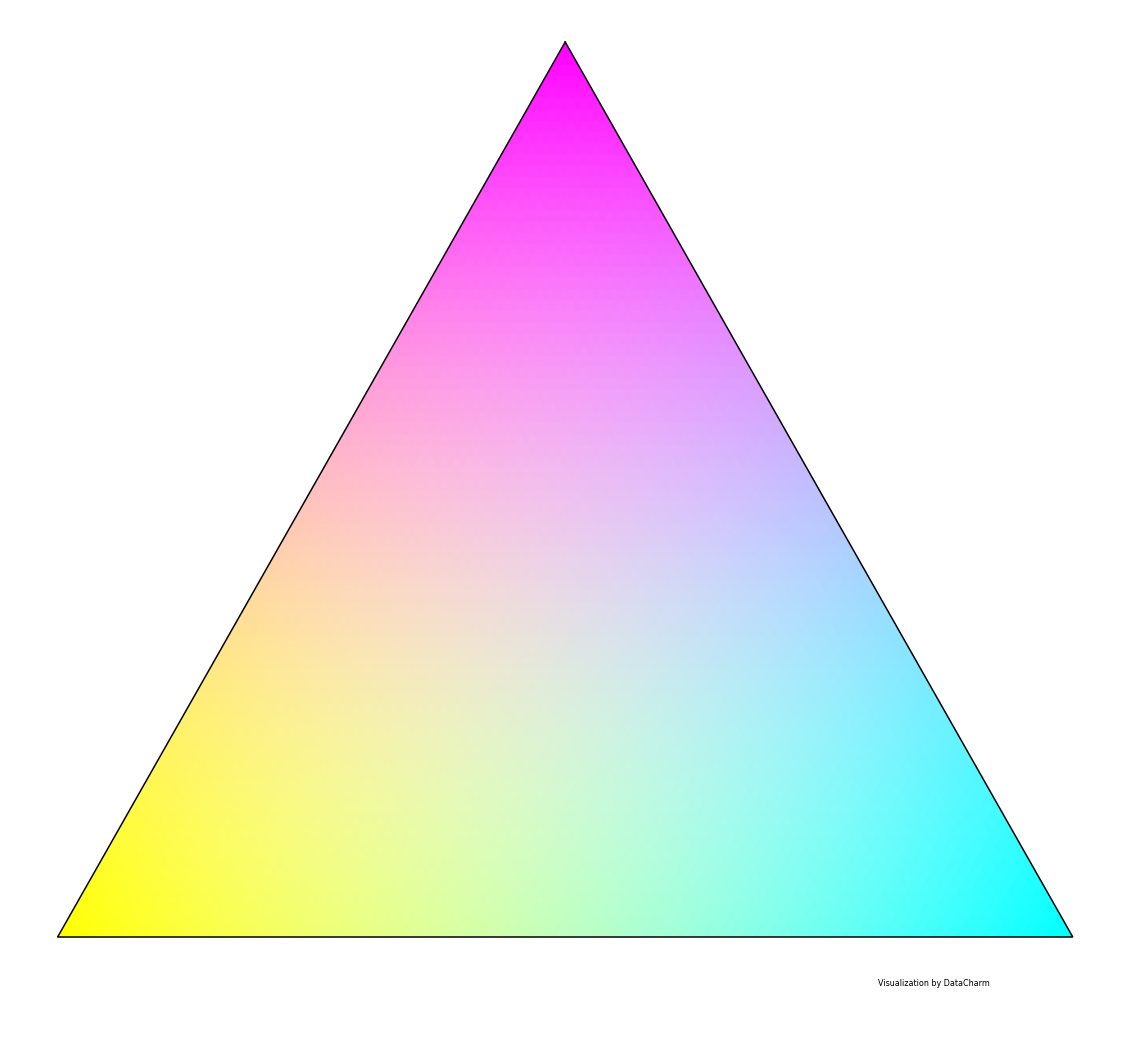

<Figure size 3600x2400 with 0 Axes>

In [ ]:
import math
import ternary
from tool import *
def color_point_r(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    k=[1,0,0]
    r1 = math.fabs(w-k[0]*x_color-k[1]*y_color-k[2]*z_color) / w
    g1 = math.fabs(w) / w
    b1 = math.fabs(w) / w
    a1=math.fabs(x_color) / w
    
    r2 = math.fabs(w) / w
    g2 = math.fabs(w-k[0]*y_color-k[1]*x_color-k[2]*z_color) / w
    b2 = math.fabs(w) / w
    a2=math.fabs(y_color) / w    
    
    r3 = math.fabs(w) / w
    g3 = math.fabs(w) / w
    b3 = math.fabs(w-k[0]*z_color-k[1]*x_color-k[2]*y_color) / w
    a3=math.fabs(z_color) / w  
    r=r1*a1+r2*a2+r3*a3
    b=b1*a1+b2*a2+b3*a3
    g=g1*a1+g2*a2+g3*a3
    return (r, g, b, 1)


def generate_heatmap_data_r(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point_r(i, j, k, scale)
    return d

fig,ax = plt.subplots()
scale = 80
data_r = generate_heatmap_data_r(scale)
plt.figure(dpi=600)
figure, tax = ternary.figure(scale=scale,ax=ax)
figure.set_size_inches(20, 19)
tax.heatmap(data_r, style="triangular", use_rgba=True, colorbar=False)
# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.boundary()
# tax.set_title("RGBA Heatmap")
ax.text(.83,.06,'\nVisualization by DataCharm',transform = ax.transAxes,
        ha='center', va='center',fontsize = 8,color='black')
figure.savefig('../figure/triangle.pdf',dpi=600)
plt.show()